## 라이브러리 불러오기

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [14]:
!pip install seaborn

In [7]:
titanic = pd.read_csv('data/titan.csv')

In [8]:
#데이터 앞부분 확인 하기 > 기본이 5개까지 보여줌 
titanic.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1


In [9]:
print(titanic.isnull().sum()) # 널값이 몇개 있는지 확인 -> 
titanic = titanic.dropna() # 널값 버려주고, 변수에 저장해줘라 

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [10]:
titanic.describe()  # 총 데이터 수, 평균, 표준편차 한눈에 볼 수 있는 코드 

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.0,1307.0,1307.0,1307.0,1307.0,...,1307.0,1307.0,1307.0,1307.000000,1307.0,1307.0,1307.000000,1307.0,1307.0,1307.000000
mean,655.319816,29.471821,33.209595,0.355011,0.499617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.296863,0.0,0.0,1.492731,0.0,0.0,0.260138
std,377.922205,12.881592,51.748768,0.478700,1.042273,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.836942,0.0,0.0,0.814626,0.0,0.0,0.438877
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.500000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.500000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


<Axes: >

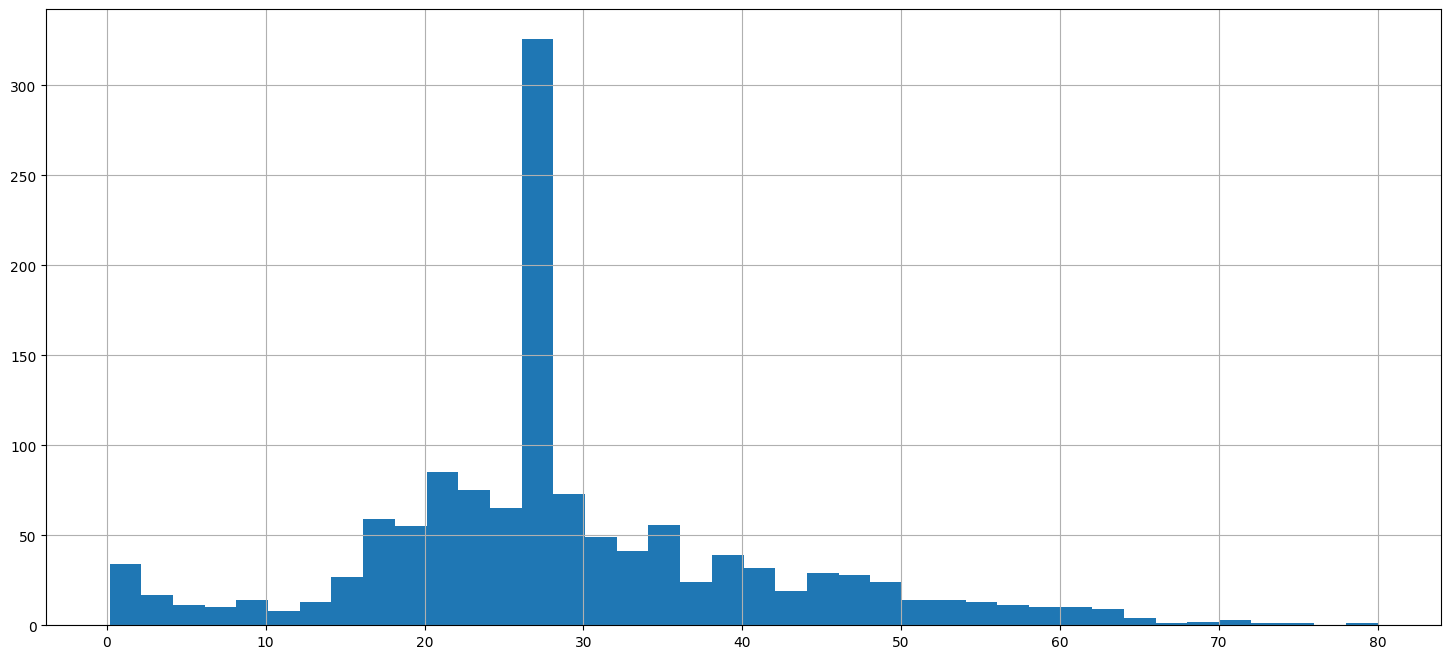

In [11]:
#나이별로 히스토그램 구하기
titanic['Age'].hist(bins=40,figsize=(18,8),grid=True)

In [12]:
#나이별 구분 및 각 나이별 생존율 확인 하기 # Age_cat컬럼 새로 생성 
titanic['Age_cat'] = pd.cut(titanic['Age'],bins=[0,3,7,15,30,60,100],include_lowest=True,labels=['baby','children','teenage','young','adult','old'])
# 라벨들을 붙여서 -> 평균값 보는 코드임 
#연령대를 기준으로 평균 값을 구해 볼수 있어요!
titanic.groupby('Age_cat').mean() # Age_cat 컬럼으로 그룹 묶을 거임 -> 1에 가까운 값을 보면 됨 

C:\Users\KDA\AppData\Local\Temp\ipykernel_34232\2794504320.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('Age_cat').mean()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Age_cat,,,,,,,,,,,,,,,,,,,,,
baby,599.121951,1.540732,29.615346,0.463415,1.487805,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.585366,0.0,0.0,1.634146,0.0,0.0,0.487805
children,599.960000,5.160000,31.022828,0.480000,1.760000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.640000,0.0,0.0,1.520000,0.0,0.0,0.560000
teenage,648.448980,11.540816,38.390904,0.510204,1.734694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.632653,0.0,0.0,1.448980,0.0,0.0,0.306122
young,658.208719,24.991413,24.710997,0.339498,0.397622,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.492734,0.0,0.0,1.491413,0.0,0.0,0.223250
adult,662.260546,41.557072,47.060453,0.359801,0.377171,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.895782,0.0,0.0,1.483871,0.0,0.0,0.292804
old,625.343750,65.500000,58.200003,0.187500,0.312500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.562500,0.0,0.0,1.500000,0.0,0.0,0.125000


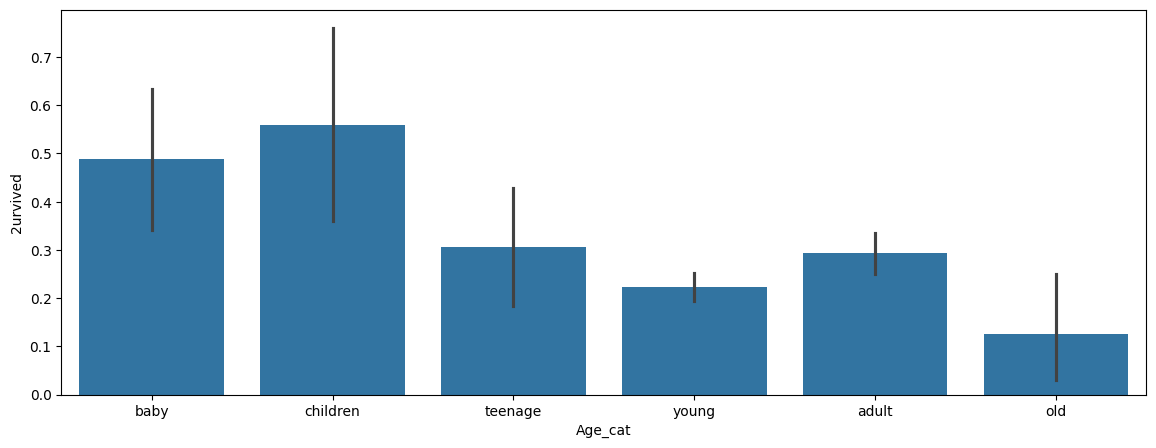

In [13]:
#그래프 크기 설정
plt.figure(figsize=(14,5)) # 종이 사이즈 

# 바 그래프 그리기 (x축 = Age_cat, y축 = Survived)
sns.barplot(x='Age_cat',y='2urvived',data=titanic) # 2urvived 생존 확인 컬럼 

# 그래프 나타내기 
plt.show()